In [1]:
import os
import json
import glob
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt
import csv

In [2]:
# 1. Identify all MRIQC json files.
mriqc_path = '../derivatives/mriqc/sub-*/ses-*/*/'

def get_mriqc_summary(image_type, metrics_to_plot):
    json_files = glob.glob(os.path.join(mriqc_path, f'*{image_type}*.json'))

    # 2. Parse each json file to extract the desired metrics.
    all_metrics = defaultdict(list)

    for jfile in json_files:
        with open(jfile, 'r') as f:
            data = json.load(f)
            for key, value in data.items():
                if key in metrics_to_plot and isinstance(value, (float, int)):
                    all_metrics[key].append(value)
    return all_metrics


In [5]:
def plot_summary_IQMs(image_type, metrics_to_plot):
    summary = get_mriqc_summary(image_type, metrics_to_plot)
    # Setting up the figure and axes
    num_metrics = len(metrics_to_plot)
    rows = (num_metrics + 1) // 3
    fig, axs = plt.subplots(rows, 3, figsize=(15, 5*rows))

    for idx, metric in enumerate(metrics_to_plot):
        ax = axs[idx // 3, idx % 3]
        values = summary[metric]
        ax.hist(values, bins=30, alpha=0.75)
        ax.set_xlabel(metric)
        ax.set_ylabel('Number of scans')
        ax.grid(True)

    # Remove any unused subplots (if an odd number of metrics)
    if num_metrics % 3 != 0:
        axs[-1, -1].axis('off')

    # Add a big title to the entire figure
    fig.suptitle(image_type, fontsize=20, y=0.92)
    if image_type == 'task':
        fig.suptitle('BOLD fMRI', fontsize=20, y=0.92)
    # Adjust the spacing between the subplots
    plt.subplots_adjust(hspace=0.2, wspace=0.2)
    plt.show()
    plt.close()

In [1]:
def get_summary_stats(image_type, metrics_to_plot):
    summary = get_mriqc_summary(image_type, metrics_to_plot)
    for metric in metrics_to_plot:
        values = summary[metric]
        print(f'{metric}: {np.mean(values):.2f} +/- {np.std(values):.2f}')

## T1w anatomical MRIQC IQMs

Signal-to-noise ratio (SNR): Relative measure of background noise \
Contrast-to-noise ratio (CNR): Measure of contrast between white and gray matter (Magnotta & Friedman, 2006) \
Foreground-background energy ratio (FBER): Average value of energy within the head compared to regions outside of the head (Shehzad et al., 2015) Larger values are better. \
Entropy focus criterion (EFC): Proxy for ghosting or blurriness caused by head motion (Atkinson et al., 1997) Smaller values are better. \
Artifact detection (QI_1): Detects artifacts from motion, blurring or ghosting (Mortamet et al., 2009) Smaller values are better. \
Gray matter signal (summary_gm_mean): Average signal of gray matter


qi_1: 0.00 +/- 0.00
cnr: 3.37 +/- 0.25
efc: 0.51 +/- 0.03
fber: 4127.96 +/- 1892.86
summary_gm_mean: 666.88 +/- 13.60
snr_total: 8.89 +/- 0.70


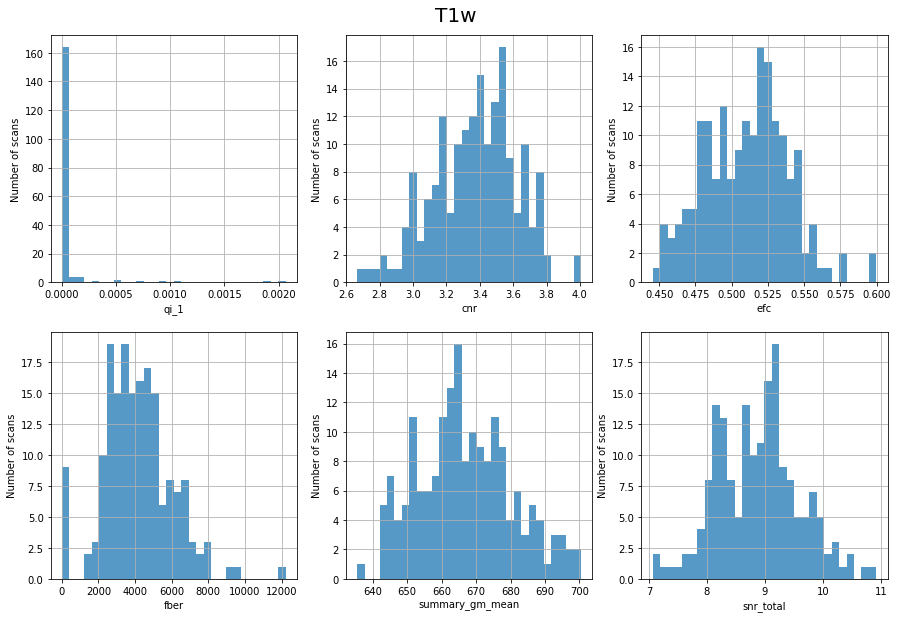

In [18]:
metrics_to_plot = ['qi_1', 'cnr', 'efc', 'fber', 'summary_gm_mean', 'snr_total']
get_summary_stats('T1w', metrics_to_plot)
plot_summary_IQMs('T1w', metrics_to_plot)


## Task BOLD MRIQC IQMs

Ghost to Signal Ratio (gsr_x, gsr_y): Measure of signal intensity in areas along encoding direction x and y compared to signal intensity inside the brain (Giannelli et al., 2010) \
DVARS (dvars_nstd):	Measure of signal changes from volume to volume. Smaller values are better. \
Framewise Displacement (fd_mean): Measure of motion throughout scan \
Temporal SNR (tsnr): Relative measure of background noise across time course \
Signal-to-noise Ratio (snr): Relative measure of background noise 

### ANT, CCTHot, discountFix, DPX, motorSelectiveStop

In [9]:
tasks = ['ANT', 'CCTHot', 'discountFix', 'DPX', 'motorSelectiveStop', 'stroop', 'stopSignal', 'surveyMedley', 'twoByTwo', 'WATT3', 'rest']
metrics_to_plot = ['gsr_x', 'gsr_y', 'dvars_vstd', 'fd_mean', 'tsnr', 'snr']

stats_dict = {}
for task in tasks:
    summary = get_mriqc_summary(task, metrics_to_plot)
    stats_dict[task] = summary
# Calculate summary statistics
summary_stats = {}
for task, metrics in stats_dict.items():
    task_summary = {}
    for metric, values in metrics.items():
        task_summary[metric + '_mean'] = sum(values) / len(values)
        task_summary[metric + '_std'] = (sum([(x - task_summary[metric + '_mean'])**2 for x in values]) / len(values))**0.5
        task_summary[metric + '_min'] = min(values)
        task_summary[metric + '_max'] = max(values)
    summary_stats[task] = task_summary

# Write to CSV
with open('summary_statistics.csv', 'w', newline='') as csvfile:
    fieldnames = ['task']
    for metric in metrics_to_plot:
        fieldnames.extend([metric + '_mean', metric + '_std', metric + '_min', metric + '_max'])
    
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    for task, metrics in summary_stats.items():
        row_data = {'task': task}
        row_data.update(metrics)
        writer.writerow(row_data)

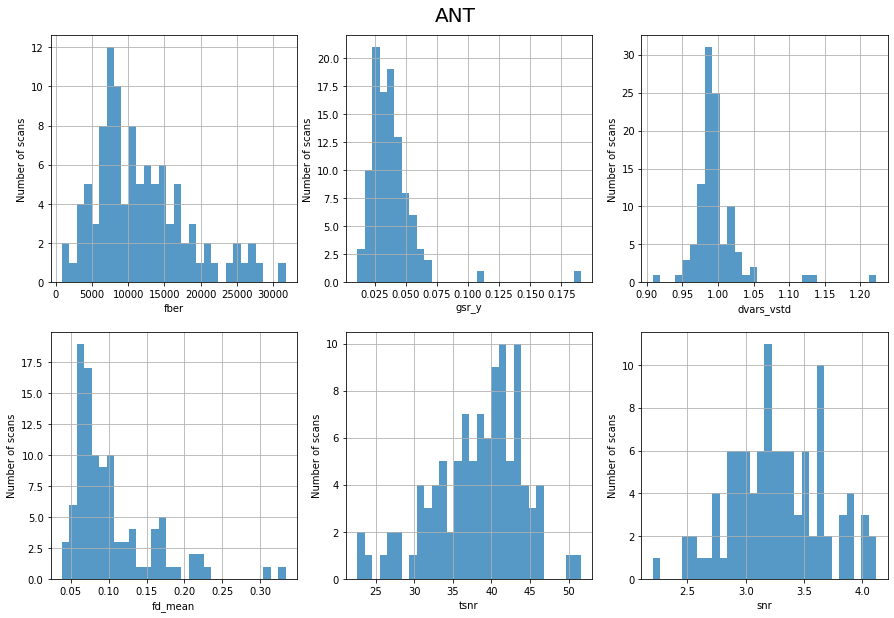

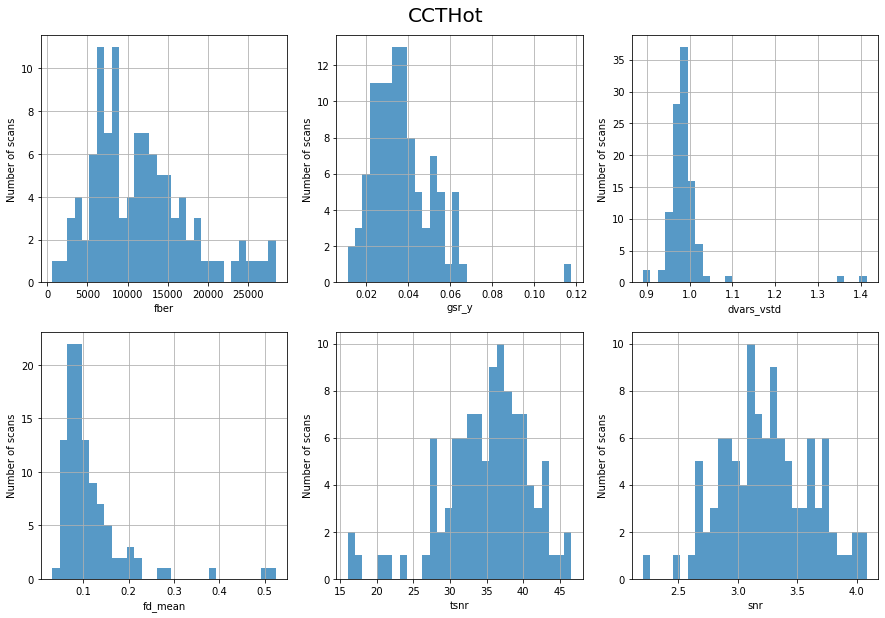

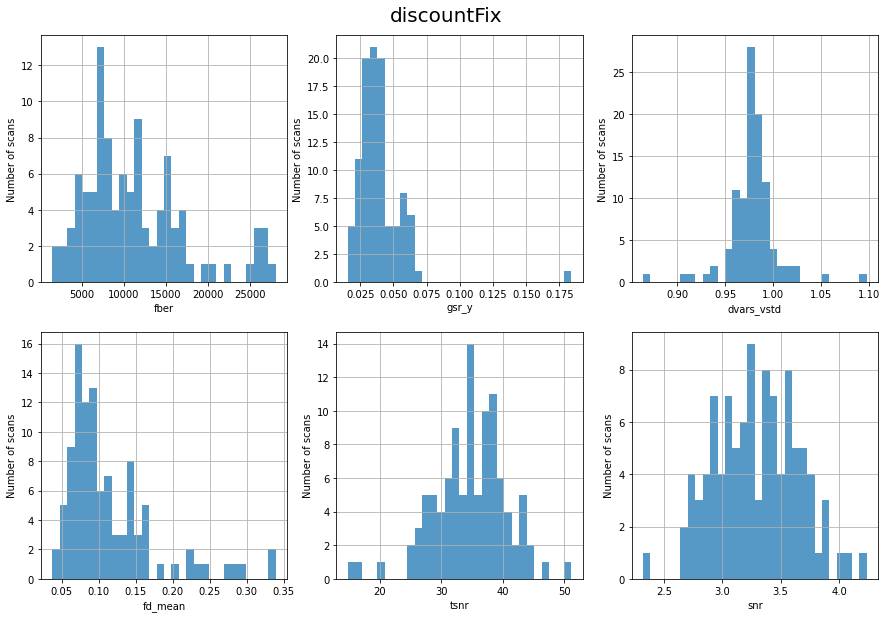

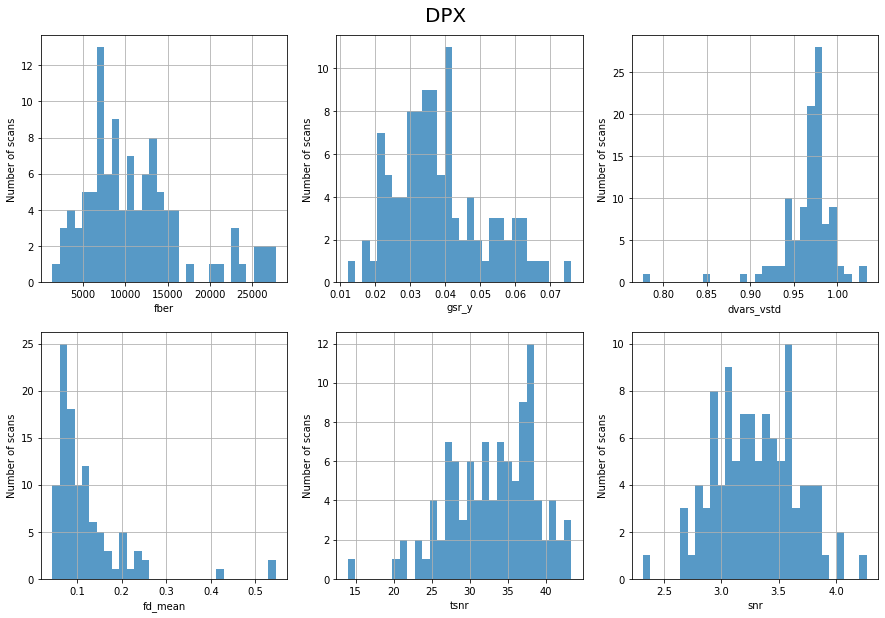

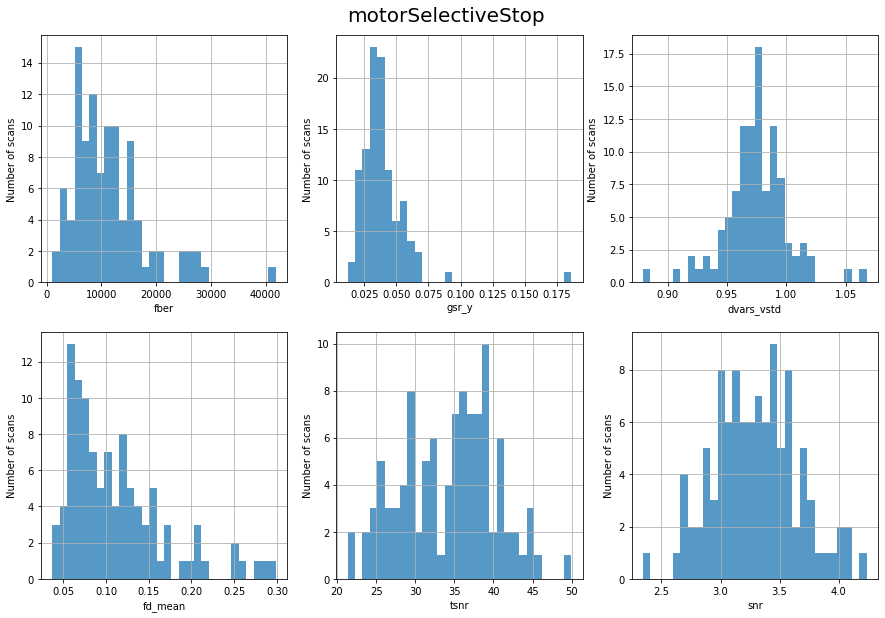

In [9]:
tasks = ['ANT', 'CCTHot', 'discountFix', 'DPX', 'motorSelectiveStop']
metrics_to_plot = ['fber', 'gsr_y', 'dvars_vstd', 'fd_mean', 'tsnr', 'snr']
for task in tasks:
    plot_summary_IQMs(task, metrics_to_plot)

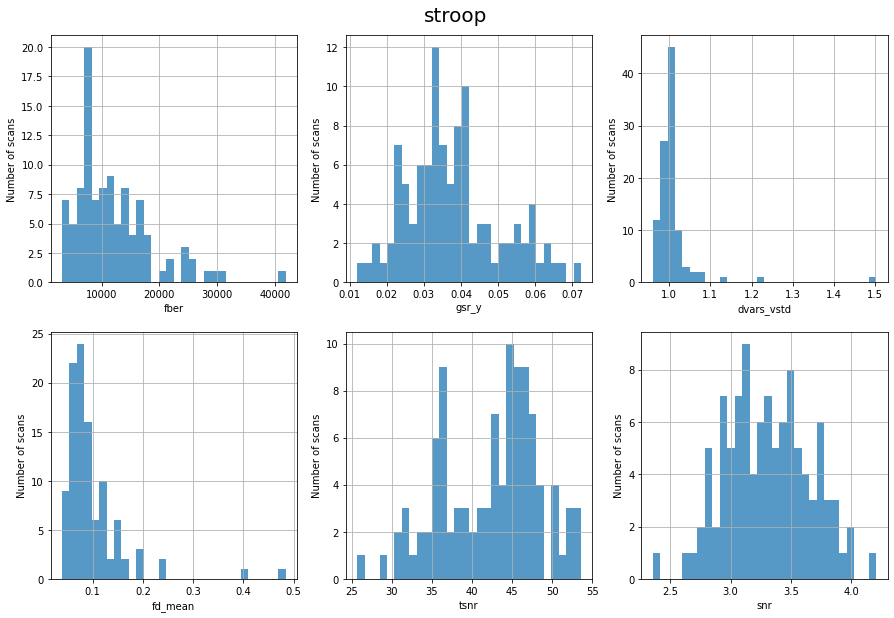

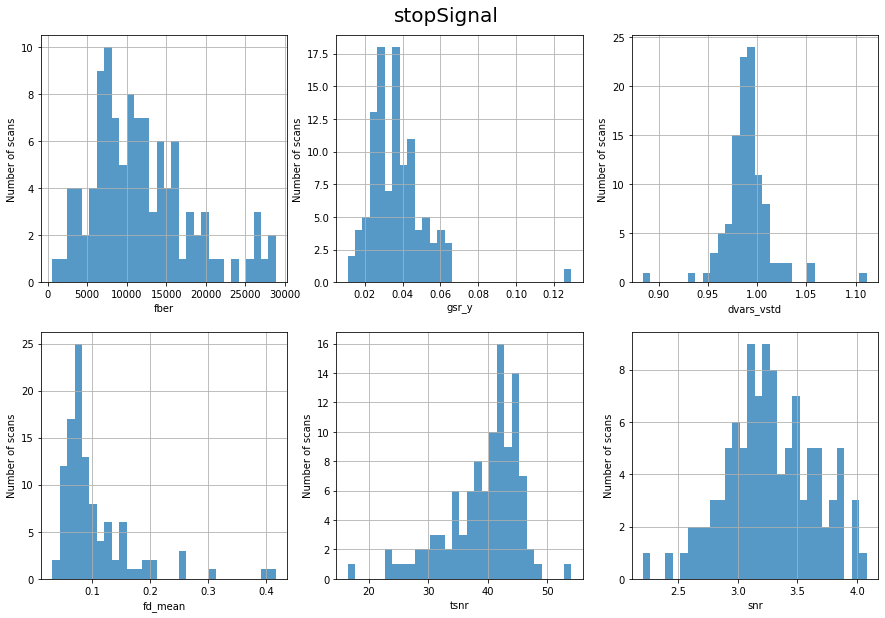

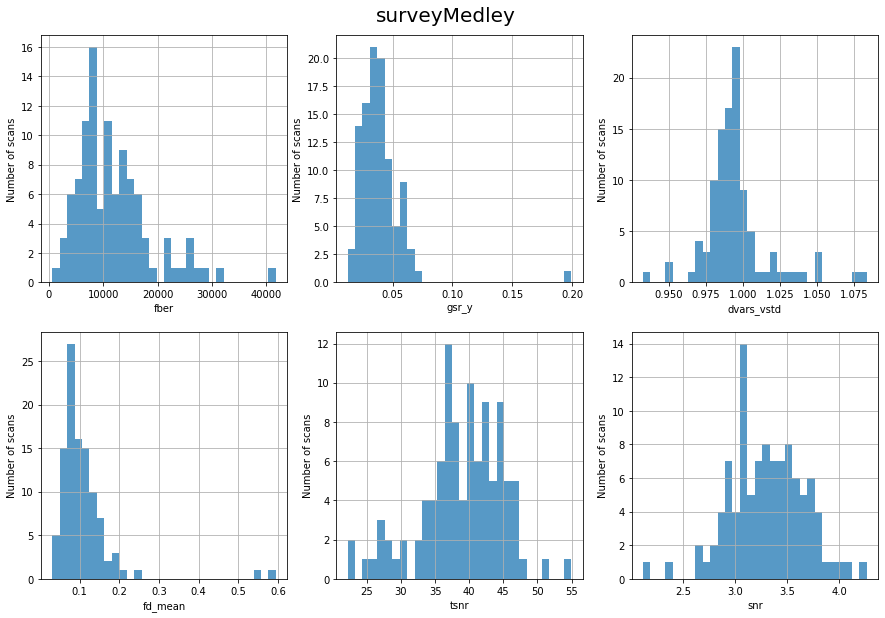

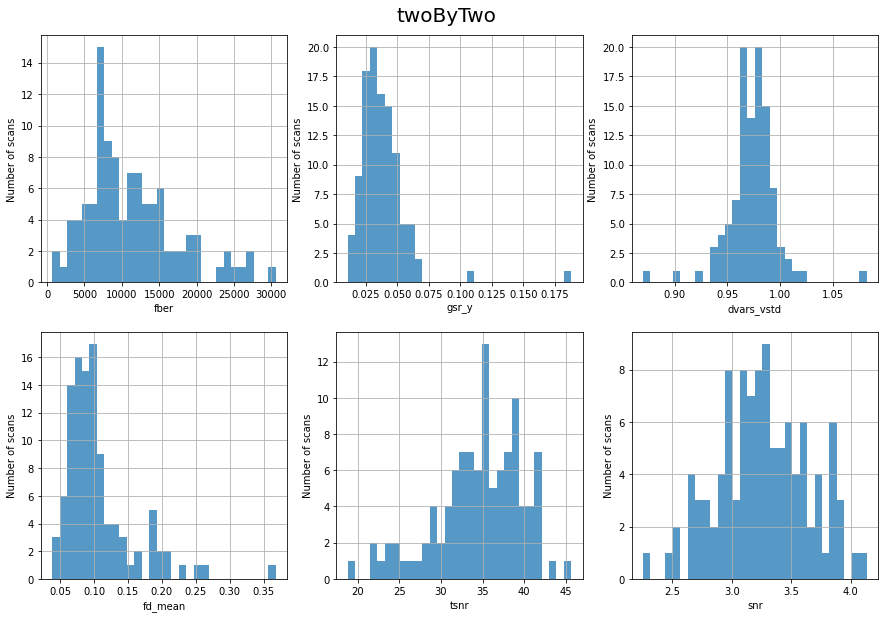

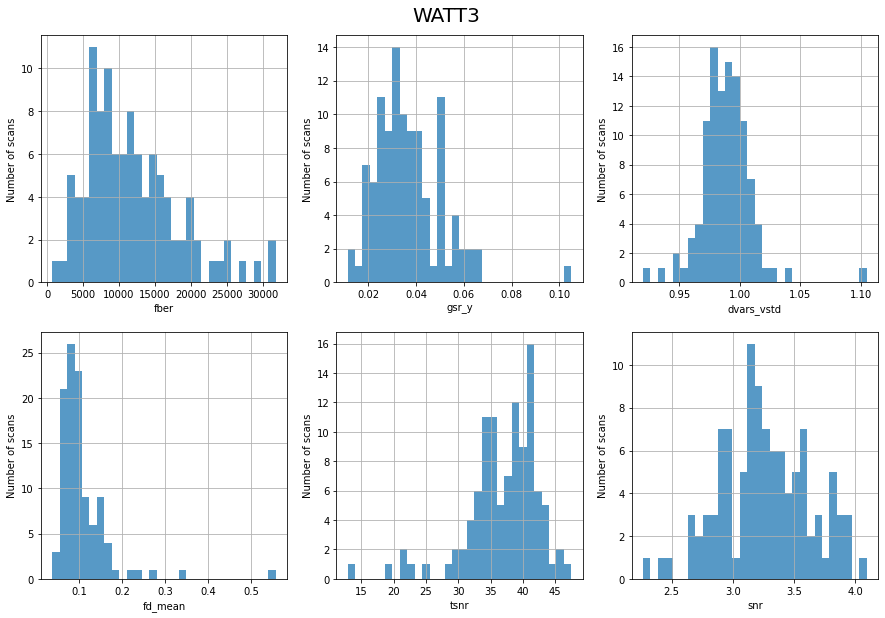

In [10]:
tasks = ['stroop', 'stopSignal', 'surveyMedley', 'twoByTwo', 'WATT3']
for task in tasks:
    plot_summary_IQMs(task, metrics_to_plot)

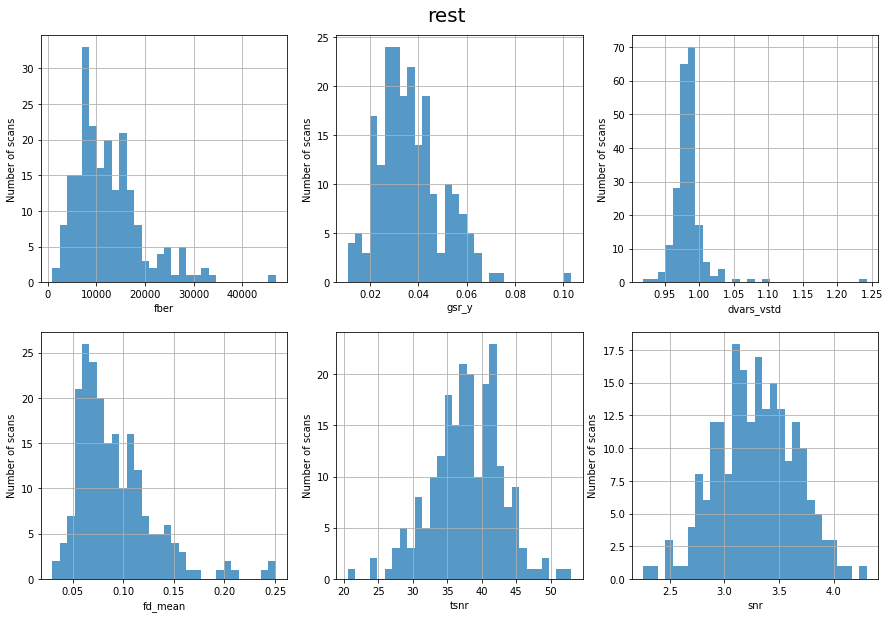

In [11]:
plot_summary_IQMs('rest', metrics_to_plot)

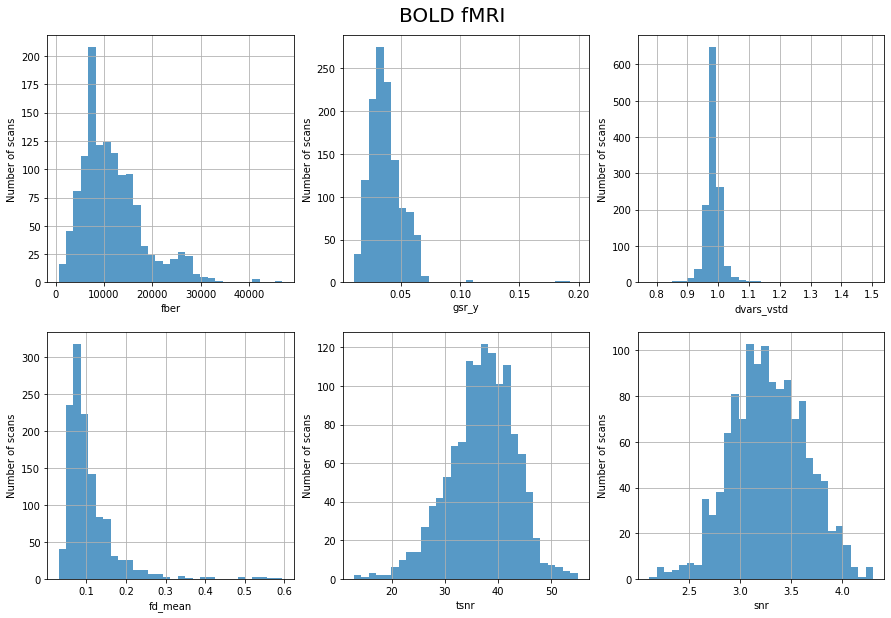

In [12]:
plot_summary_IQMs('task', metrics_to_plot)